<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Smarthwatch_Data_Analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go 
import seaborn as sns


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/dailyActivity_merged.csv')
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [5]:
np.around(data.describe(),2)

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00
mean,4.855407e+09,7637.91,5.49,5.48,0.11,1.50,0.57,3.34,0.00,21.16,13.56,192.81,991.21,2303.61
std,2.424805e+09,5087.15,3.92,3.91,0.62,2.66,0.88,2.04,0.01,32.84,19.99,109.17,301.27,718.17
min,1.503960e+09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.320127e+09,3789.75,2.62,2.62,0.00,0.00,0.00,1.95,0.00,0.00,0.00,127.00,729.75,1828.50
50%,4.445115e+09,7405.50,5.24,5.24,0.00,0.21,0.24,3.36,0.00,4.00,6.00,199.00,1057.50,2134.00
75%,6.962181e+09,10727.00,7.71,7.71,0.00,2.05,0.80,4.78,0.00,32.00,19.00,264.00,1229.50,2793.25
max,8.877689e+09,36019.00,28.03,28.03,4.94,21.92,6.48,10.71,0.11,210.00,143.00,518.00,1440.00,4900.00


Text(0.5, 1.0, 'Correlation between columns')

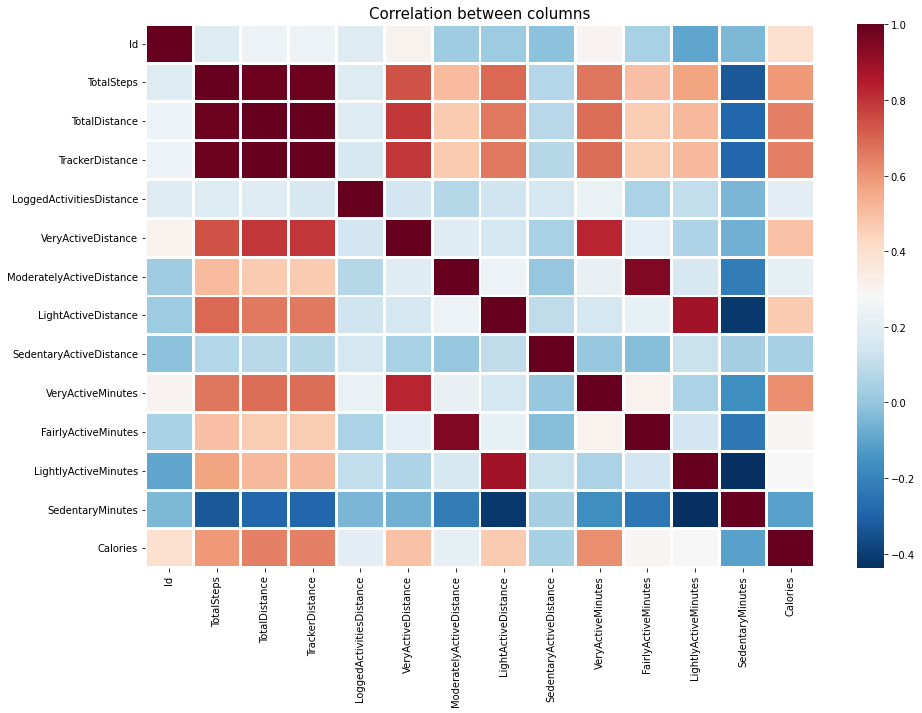

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),linewidths=2, linecolor="white", cmap="RdBu_r" )
plt.title("Correlation between columns", fontsize=15)


In [25]:
data.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [27]:
data['ActivityDate'] = pd.to_datetime(data['ActivityDate'],format="%m/%d/%Y")

In [28]:
data["TotalMinutes"] = data["VeryActiveMinutes"] + data["FairlyActiveMinutes"] + data["LightlyActiveMinutes"] + data["SedentaryMinutes"]
print(data["TotalMinutes"].sample(5))

660    1440
160    1440
664    1440
604     905
599    1440
Name: TotalMinutes, dtype: int64


In [29]:
figure = px.scatter(data_frame=data, x="Calories",
                    y = "TotalSteps", size="VeryActiveMinutes",
                    trendline="ols",
                    title="Relationship between Calories & Total Steps")
figure.show()

In [31]:
data["Day"] = data["ActivityDate"].dt.day_name()
print(data['Day'].head())

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: Day, dtype: object


In [32]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["VeryActiveMinutes"],
    name="Very Active",
    marker_color='#6f2da8'
))
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["FairlyActiveMinutes"],
    name="Fairly Active",
    marker_color='#4f86f7'
))
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["LightlyActiveMinutes"],
    name="Lightly Active",
    marker_color='#fc5a8d'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

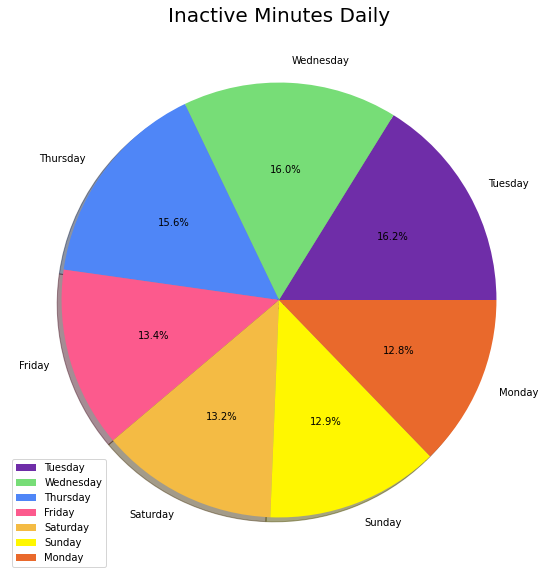

In [36]:
day = data["Day"].value_counts()
labels = day.index
counts = day.values
colors =['#6f2da8','#77dd77','#4f86f7', '#fc5a8d', '#F4BB44', '#fff700','#E9692C']

plt.figure(figsize=(10,10))
plt.pie(x=counts,labels=labels, shadow=True, autopct='%1.1f%%',colors=colors)
plt.title("Inactive Minutes Daily", fontsize=20)
plt.show()

In [40]:
calories = data.groupby(["Day"])["Calories"].count()
calories

Day
Friday       126
Monday       120
Saturday     124
Sunday       121
Thursday     147
Tuesday      152
Wednesday    150
Name: Calories, dtype: int64

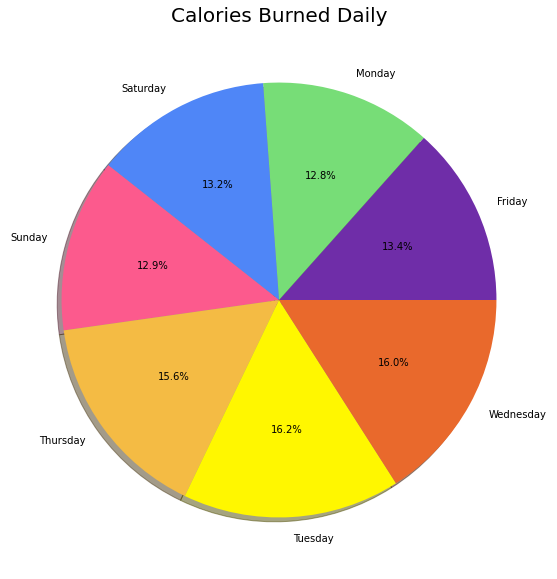

In [41]:
labels = calories.index
counts = calories.values
colors =['#6f2da8','#77dd77','#4f86f7', '#fc5a8d', '#F4BB44', '#fff700','#E9692C']

plt.figure(figsize=(10,10))
plt.pie(x=counts,labels=labels, shadow=True, autopct='%1.1f%%',colors=colors)
plt.title("Calories Burned Daily", fontsize=20)
plt.show()